In [1]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense

## задание 1

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None


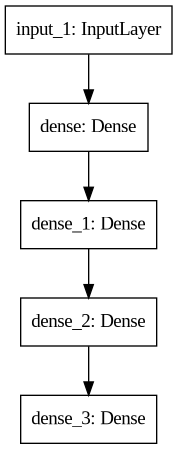

In [2]:
input_layer = Input(shape=(10,))
hidden_layer_1 = Dense(10, activation='relu')(input_layer)
hidden_layer_2 = Dense(20, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(10, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

print(model.summary())
plot_model(model)

## задание 2

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
None


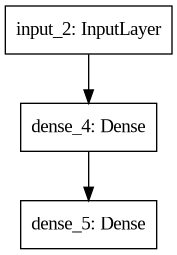

In [3]:
input_layer = Input(shape=(3,))
hidden_layer_1 = Dense(4, activation='relu')(input_layer)
output_layer = Dense(2, activation='sigmoid')(hidden_layer_1)

model = Model(inputs=input_layer, outputs=output_layer)

print(model.summary())
plot_model(model)

## задание 3

In [11]:
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
import keras.models as k_models
import keras.layers as k_layers
import keras.backend as k_backend
from keras.datasets import mnist

In [9]:
# загрузим готовый датасет
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [ ]:
посмотрим на полученный датасет:
print(x_train.shape)
print(x_val.shape)
print(x_train[0].size)
# теперь понятно, что каждый элемент датасета(черно-белая картинка)
# закодирован в виде np массива, каждый элемент которого, показывает
# насыщенность(градиент белое-черное) очередного пиеселя

In [37]:
# 
y_train_binary_vector = keras.utils.to_categorical(y_train, 10)
y_val_binary_vector = keras.utils.to_categorical(y_val, 10)

k_backend.clear_session()

model = k_models.Sequential()
model.add(k_layers.Dense(784, activation='elu'))
model.add(k_layers.Dense(128, activation='elu'))
model.add(k_layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

x_train_float = x_train.astype(np.float) / 255 - 0.5
x_val_float = x_val.astype(np.float) / 255 - 0.5

In [38]:
results = model.fit(x_train_float.reshape(-1, 28*28),
                    y_train_binary_vector,
                    batch_size=64,
                    epochs=10, 
                    validation_data=(x_val_float.reshape(-1, 28*28),
                                     y_val_binary_vector)
                   )

Epoch 1/10
938/938 [==============================] - 5s 6ms/step - loss: 0.4884 - accuracy: 0.8247 - val_loss: 0.4298 - val_accuracy: 0.8415
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3762 - accuracy: 0.8620 - val_loss: 0.4071 - val_accuracy: 0.8538
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3361 - accuracy: 0.8756 - val_loss: 0.4043 - val_accuracy: 0.8578
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.3124 - accuracy: 0.8832 - val_loss: 0.3601 - val_accuracy: 0.8707
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2971 - accuracy: 0.8893 - val_loss: 0.3673 - val_accuracy: 0.8684
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2831 - accuracy: 0.8944 - val_loss: 0.3529 - val_accuracy: 0.8813
Epoch 7/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2673 - accuracy: 0.8992 - val_loss: 0.3538 - val_accuracy: 0.8768
Epoch 

In [39]:
print(np.mean(results.history['val_accuracy']))
print(np.max(results.history['val_accuracy']))

0.8679699897766113
0.8830999732017517
